In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Breast_cancer_data_train = pd.read_excel("C:/Users/Chesta Dhingra/Downloads/Deep_learning_series/Train.xlsx")
Breast_cancer_data_test = pd.read_excel("C:/Users/Chesta Dhingra/Downloads/Deep_learning_series/Test.xlsx")

In [3]:
Breast_cancer_data_train.isnull().sum()

Index            0
BI_RADS          2
Age             88
Shape           30
Margin          47
Mass_Density    76
Severity         0
dtype: int64

In [4]:
Breast_cancer_data_test.isnull().sum()

Index            0
BI_RADS          0
Age             12
Shape            1
Margin           1
Mass_Density     0
Severity         0
dtype: int64

In [5]:
Breast_cancer_data_test["type"] = "test"
Breast_cancer_data_test

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
0,1,5,65.0,lobular,ill-defined,low,1,test
1,2,5,74.0,lobular,microlobulated,low,1,test
2,3,4,NaN,oval,circumscribed,low,0,test
3,4,4,57.0,irregular,ill-defined,fat-containing,1,test
4,5,4,76.0,lobular,microlobulated,low,0,test
...,...,...,...,...,...,...,...,...
145,146,4,47.0,oval,circumscribed,low,0,test
146,147,4,56.0,irregular,spiculated,low,1,test
147,148,4,64.0,irregular,spiculated,low,0,test
148,149,5,66.0,irregular,spiculated,low,1,test


In [6]:
Breast_cancer_data_train["type"]="train"
Breast_cancer_data_train

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
0,1,5.0,67.0,lobular,spiculated,low,1,train
1,2,4.0,43.0,round,circumscribed,NaN,1,train
2,3,5.0,58.0,irregular,spiculated,low,1,train
3,4,4.0,28.0,round,circumscribed,low,0,train
4,5,5.0,74.0,round,spiculated,NaN,1,train
...,...,...,...,...,...,...,...,...
806,807,5.0,62.0,irregular,ill-defined,iso,1,train
807,808,4.0,56.0,oval,circumscribed,low,0,train
808,809,5.0,58.0,irregular,ill-defined,low,1,train
809,810,4.0,NaN,round,ill-defined,low,0,train


Null Values in Data

<AxesSubplot:>

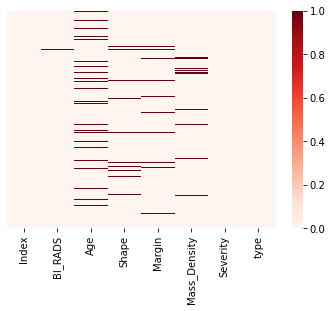

In [7]:
Breast_cancer_data = pd.concat([Breast_cancer_data_test, Breast_cancer_data_train])
sns.heatmap(Breast_cancer_data.isnull(), yticklabels=False,cmap='Reds')

In [8]:
Breast_cancer_data.drop("Index", axis='columns',inplace=True)
Breast_cancer_data

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
0,5.0,65.0,lobular,ill-defined,low,1,test
1,5.0,74.0,lobular,microlobulated,low,1,test
2,4.0,NaN,oval,circumscribed,low,0,test
3,4.0,57.0,irregular,ill-defined,fat-containing,1,test
4,4.0,76.0,lobular,microlobulated,low,0,test
...,...,...,...,...,...,...,...
806,5.0,62.0,irregular,ill-defined,iso,1,train
807,4.0,56.0,oval,circumscribed,low,0,train
808,5.0,58.0,irregular,ill-defined,low,1,train
809,4.0,NaN,round,ill-defined,low,0,train


In [9]:
Breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 810
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       959 non-null    float64
 1   Age           861 non-null    float64
 2   Shape         930 non-null    object 
 3   Margin        913 non-null    object 
 4   Mass_Density  885 non-null    object 
 5   Severity      961 non-null    int64  
 6   type          961 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 60.1+ KB


In [10]:
Breast_cancer_data.dtypes

BI_RADS         float64
Age             float64
Shape            object
Margin           object
Mass_Density     object
Severity          int64
type             object
dtype: object

In [11]:
Breast_cancer_data.isnull().sum()

BI_RADS           2
Age             100
Shape            31
Margin           48
Mass_Density     76
Severity          0
type              0
dtype: int64

Replacing the values like 55.0, 6.0 or 0.0 with 1.0 in the BI_RADS as the data is ordinal and been classified from 1 to 5

In [12]:
Breast_cancer_data['BI_RADS'] = np.where(
   (Breast_cancer_data['BI_RADS'] ==55.),1., Breast_cancer_data['BI_RADS']
   )
Breast_cancer_data['BI_RADS']= np.where(
   (Breast_cancer_data['BI_RADS'] ==6.),1., Breast_cancer_data['BI_RADS']
   )
Breast_cancer_data['BI_RADS'] = Breast_cancer_data['BI_RADS'].fillna(1)
Breast_cancer_data['BI_RADS']

0      5.0
1      5.0
2      4.0
3      4.0
4      4.0
      ... 
806    5.0
807    4.0
808    5.0
809    4.0
810    5.0
Name: BI_RADS, Length: 961, dtype: float64

In [13]:
Breast_cancer_data['BI_RADS'].value_counts()

4.0    547
5.0    345
3.0     36
2.0     14
1.0     14
0.0      5
Name: BI_RADS, dtype: int64

In [14]:
Breast_cancer_data['BI_RADS']= np.where(
   (Breast_cancer_data['BI_RADS'] ==0.),1., Breast_cancer_data['BI_RADS']
   )
Breast_cancer_data['BI_RADS'].value_counts()

4.0    547
5.0    345
3.0     36
1.0     19
2.0     14
Name: BI_RADS, dtype: int64

In [15]:
Breast_cancer_data["BI_RADS"]=Breast_cancer_data["BI_RADS"].astype('str')
Breast_cancer_data["Severity"]= Breast_cancer_data["Severity"].astype('str')
Breast_cancer_data.dtypes

BI_RADS          object
Age             float64
Shape            object
Margin           object
Mass_Density     object
Severity         object
type             object
dtype: object

Text(0.5, 1.0, 'Age Histogram')

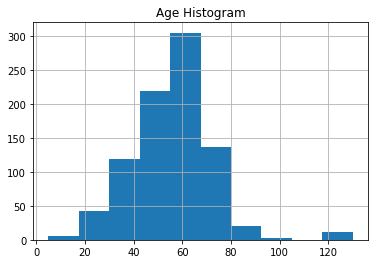

In [16]:
Breast_cancer_data['Age'].hist()
plt.title("Age Histogram")

Text(0.5, 1.0, 'BI_RADS histogram')

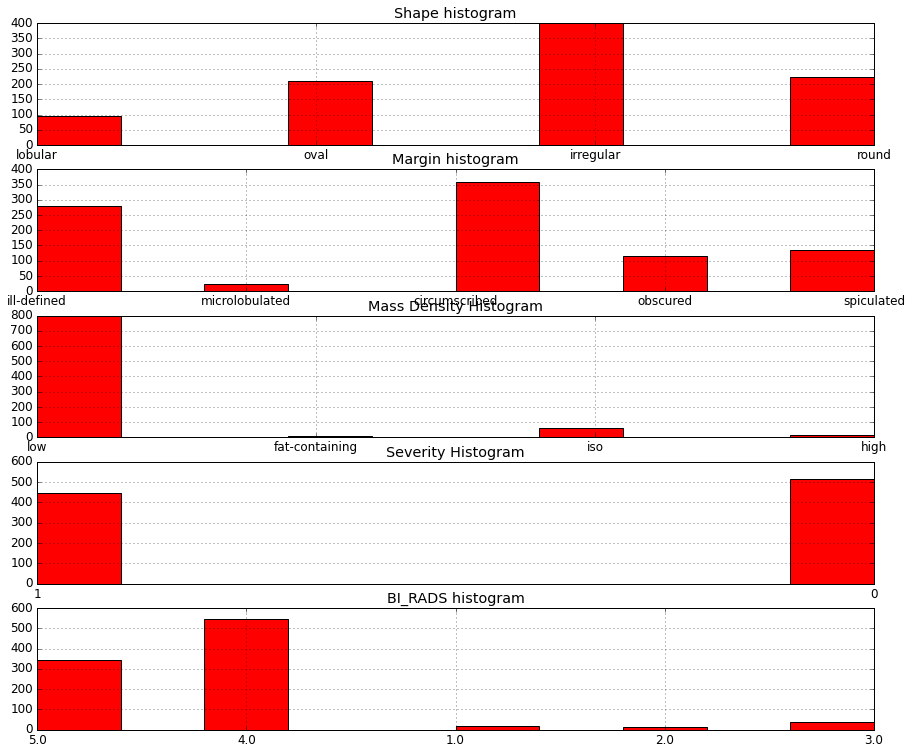

In [17]:
plt.figure(figsize=[15,13])
plt.style.use("classic")
plt.subplot(511)
Breast_cancer_data["Shape"].hist(color='r')
plt.title("Shape histogram")
plt.subplot(512)
Breast_cancer_data["Margin"].hist(color='r')
plt.title("Margin histogram")
plt.subplot(513)
Breast_cancer_data["Mass_Density"].hist(color='r')
plt.title("Mass Density Histogram")
plt.subplot(514)
Breast_cancer_data['Severity'].hist(color='r')
plt.title("Severity Histogram")
plt.subplot(515)
Breast_cancer_data['BI_RADS'].hist(color='r')
plt.title("BI_RADS histogram")

<AxesSubplot:xlabel='Age', ylabel='Density'>

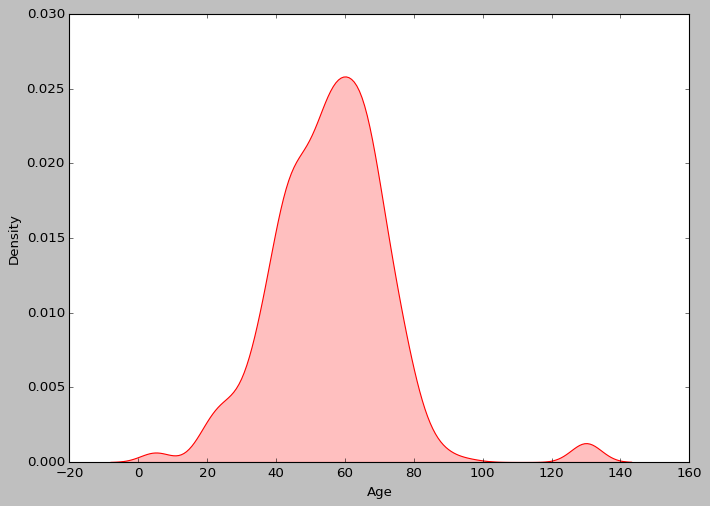

In [18]:
plt.figure(figsize=(10,7))
sns.kdeplot(Breast_cancer_data[ "Age"], label = "Age Density plot",shade= True, color="r")

C:\Users\Chesta Dhingra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

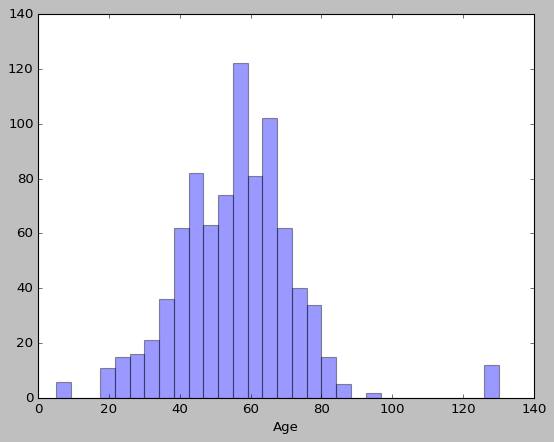

In [19]:
sns.distplot(Breast_cancer_data['Age'].dropna(), kde=False,bins=30)

In [20]:
Breast_cancer_data.describe()

,Age
count,861.000000
mean,55.860627
std,16.969647
min,5.000000
25%,45.000000
50%,56.000000
75%,66.000000
max,130.000000


In [21]:
Breast_cancer_data["Severity"].value_counts()

0    516
1    445
Name: Severity, dtype: int64

# Outlier treatment in the Age Column

In [22]:
Breast_cancer_data[Breast_cancer_data["Age"]==130]


,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
16,5.0,130.0,irregular,obscured,low,1,test
19,5.0,130.0,irregular,ill-defined,low,1,test
37,5.0,130.0,oval,circumscribed,low,1,test
119,5.0,130.0,irregular,spiculated,low,0,train
132,5.0,130.0,irregular,ill-defined,low,0,train
169,5.0,130.0,irregular,spiculated,low,1,train
195,5.0,130.0,irregular,ill-defined,low,1,train
330,5.0,130.0,lobular,spiculated,low,1,train
466,5.0,130.0,irregular,spiculated,low,1,train
578,5.0,130.0,lobular,microlobulated,low,1,train


In [23]:
Breast_cancer_data[Breast_cancer_data["Age"]==5]


,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
460,4.0,5.0,round,circumscribed,NaN,0,train
503,4.0,5.0,round,circumscribed,low,0,train
629,4.0,5.0,oval,circumscribed,low,0,train
780,4.0,5.0,round,circumscribed,low,0,train
802,4.0,5.0,oval,circumscribed,low,0,train
805,5.0,5.0,irregular,ill-defined,iso,1,train


<AxesSubplot:xlabel='Age', ylabel='Severity'>

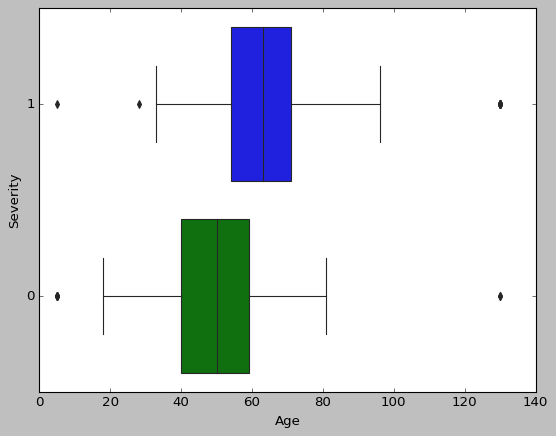

In [24]:
sns.boxplot(x='Age',y="Severity", data= Breast_cancer_data)

In [25]:
Breast_cancer_data['Age'].fillna(Breast_cancer_data['Age'].median(),inplace=True)
Breast_cancer_data.isnull().sum()

BI_RADS          0
Age              0
Shape           31
Margin          48
Mass_Density    76
Severity         0
type             0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='BI_RADS'>

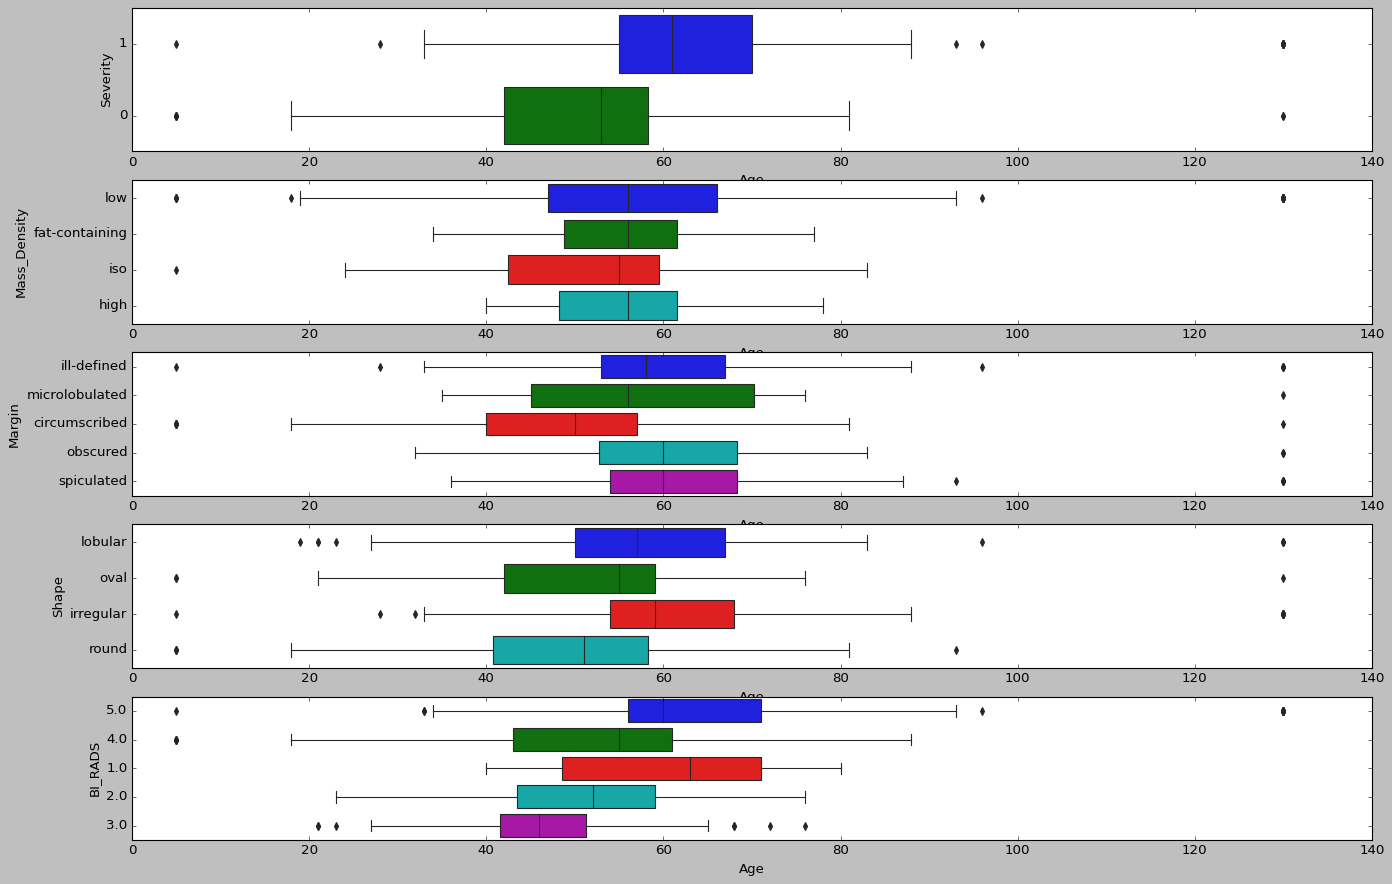

In [26]:
plt.figure(figsize=[20,13])
plt.style.use("classic")
plt.subplot(511)
sns.boxplot(x='Age',y="Severity", data= Breast_cancer_data)
plt.subplot(512)
sns.boxplot(x='Age',y="Mass_Density", data= Breast_cancer_data)
plt.subplot(513)
sns.boxplot(x='Age',y="Margin", data= Breast_cancer_data)
plt.subplot(514)
sns.boxplot(x='Age',y="Shape", data= Breast_cancer_data)
plt.subplot(515)
sns.boxplot(x='Age',y="BI_RADS", data= Breast_cancer_data)

In [27]:
Breast_cancer_data['Age'].quantile(0.25)

46.0

In [28]:
Breast_cancer_data['Age'].quantile(0.75)

65.0

In [29]:
Breast_cancer_data['Age'].quantile(0.02)

22.2

In [30]:
Breast_cancer_data['Age'].quantile(0.98)

83.0

In [31]:
Breast_cancer_data['Age'] = np.where(Breast_cancer_data['Age']<22.2,22.2,Breast_cancer_data['Age'])
Breast_cancer_data['Age'] = np.where(Breast_cancer_data['Age']>83.0,83.0, Breast_cancer_data['Age'])


<AxesSubplot:ylabel='Density'>

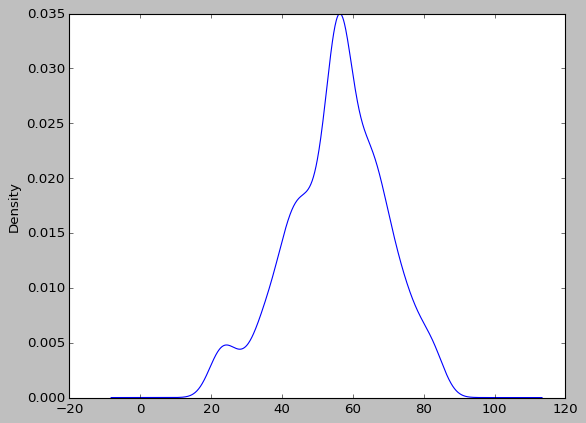

In [32]:
Breast_cancer_data['Age'].plot(kind='kde')

In [33]:
Breast_cancer_data.isnull().sum()

BI_RADS          0
Age              0
Shape           31
Margin          48
Mass_Density    76
Severity         0
type             0
dtype: int64

In [34]:
Breast_cancer_data.head(20)

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
0,5.0,65.0,lobular,ill-defined,low,1,test
1,5.0,74.0,lobular,microlobulated,low,1,test
2,4.0,56.0,oval,circumscribed,low,0,test
3,4.0,57.0,irregular,ill-defined,fat-containing,1,test
4,4.0,76.0,lobular,microlobulated,low,0,test
5,4.0,63.0,round,ill-defined,low,0,test
6,4.0,44.0,round,circumscribed,low,0,test
7,4.0,42.0,lobular,circumscribed,iso,0,test
8,4.0,56.0,lobular,NaN,iso,0,test
9,5.0,65.0,irregular,obscured,low,1,test


In [35]:
Breast_cancer_data['Shape']=np.where((Breast_cancer_data['Shape']=='round'),'1',Breast_cancer_data['Shape'])
Breast_cancer_data['Shape']=np.where((Breast_cancer_data['Shape']=='oval'),'2',Breast_cancer_data['Shape'])
Breast_cancer_data['Shape']=np.where((Breast_cancer_data['Shape']=='lobular'),'3',Breast_cancer_data['Shape'])
Breast_cancer_data['Shape']=np.where((Breast_cancer_data['Shape']=='irregular'),'4',Breast_cancer_data['Shape'])

Breast_cancer_data['Margin']=np.where((Breast_cancer_data['Margin']=='circumscribed'),'1',Breast_cancer_data['Margin'])
Breast_cancer_data['Margin']=np.where((Breast_cancer_data['Margin']=='microlobulated'),'2',Breast_cancer_data['Margin'])
Breast_cancer_data['Margin']=np.where((Breast_cancer_data['Margin']=='obscured'),'3',Breast_cancer_data['Margin'])
Breast_cancer_data['Margin']=np.where((Breast_cancer_data['Margin']=='ill-defined'),'4',Breast_cancer_data['Margin'])
Breast_cancer_data['Margin']=np.where((Breast_cancer_data['Margin']=='spiculated'),'5',Breast_cancer_data['Margin'])

Breast_cancer_data['Mass_Density']=np.where((Breast_cancer_data['Mass_Density']=='high'),'1',Breast_cancer_data['Mass_Density'])
Breast_cancer_data['Mass_Density']=np.where((Breast_cancer_data['Mass_Density']=='iso'),'2',Breast_cancer_data['Mass_Density'])
Breast_cancer_data['Mass_Density']=np.where((Breast_cancer_data['Mass_Density']=='low'),'3',Breast_cancer_data['Mass_Density'])
Breast_cancer_data['Mass_Density']=np.where((Breast_cancer_data['Mass_Density']=='fat-containing'),'4',Breast_cancer_data['Mass_Density'])

Breast_cancer_data.head(20)

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
0,5.0,65.0,3,4,3,1,test
1,5.0,74.0,3,2,3,1,test
2,4.0,56.0,2,1,3,0,test
3,4.0,57.0,4,4,4,1,test
4,4.0,76.0,3,2,3,0,test
5,4.0,63.0,1,4,3,0,test
6,4.0,44.0,1,1,3,0,test
7,4.0,42.0,3,1,2,0,test
8,4.0,56.0,3,NaN,2,0,test
9,5.0,65.0,4,3,3,1,test


In [36]:
from sklearn.impute import KNNImputer

In [37]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [38]:
Breast_cancer_data['Shape']= imputer.fit_transform(Breast_cancer_data[['Shape']])

In [39]:
Breast_cancer_data['Margin']=imputer.fit_transform(Breast_cancer_data[['Margin']])

In [40]:
Breast_cancer_data['Mass_Density']=imputer.fit_transform(Breast_cancer_data[['Mass_Density']])

In [41]:
Breast_cancer_data.dtypes

BI_RADS          object
Age             float64
Shape           float64
Margin          float64
Mass_Density    float64
Severity         object
type             object
dtype: object

In [42]:
Breast_cancer_data['Shape']=round(Breast_cancer_data['Shape'])
Breast_cancer_data['Margin']=round(Breast_cancer_data['Margin'])
Breast_cancer_data['Mass_Density']=round(Breast_cancer_data['Mass_Density'])

Breast_cancer_data['Shape']=Breast_cancer_data['Shape'].astype('str')
Breast_cancer_data['Margin']=Breast_cancer_data['Margin'].astype('str')
Breast_cancer_data['Mass_Density']=Breast_cancer_data['Mass_Density'].astype('str')

In [43]:
Breast_cancer_data.dtypes

BI_RADS          object
Age             float64
Shape            object
Margin           object
Mass_Density     object
Severity         object
type             object
dtype: object

Text(0.5, 1.0, 'BI_RADS histogram')

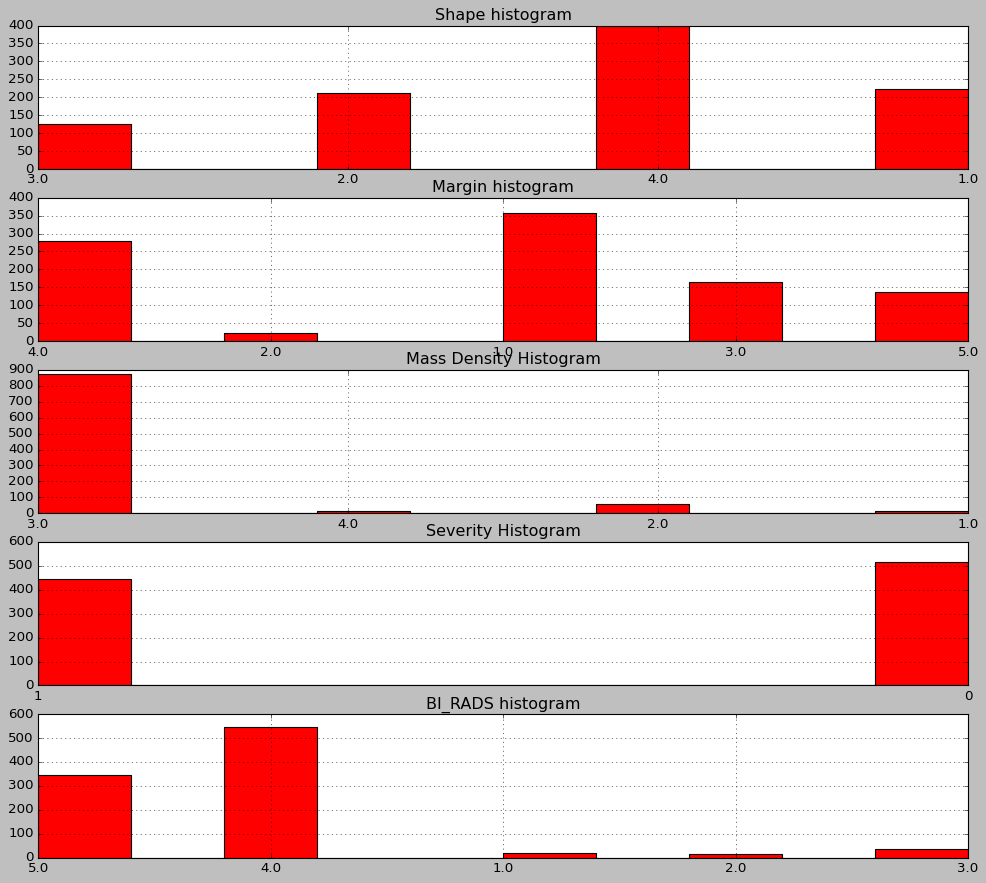

In [44]:
plt.figure(figsize=[15,13])
plt.style.use("classic")
plt.subplot(511)
Breast_cancer_data["Shape"].hist(color='r')
plt.title("Shape histogram")
plt.subplot(512)
Breast_cancer_data["Margin"].hist(color='r')
plt.title("Margin histogram")
plt.subplot(513)
Breast_cancer_data["Mass_Density"].hist(color='r')
plt.title("Mass Density Histogram")
plt.subplot(514)
Breast_cancer_data['Severity'].hist(color='r')
plt.title("Severity Histogram")
plt.subplot(515)
Breast_cancer_data['BI_RADS'].hist(color='r')
plt.title("BI_RADS histogram")

<AxesSubplot:xlabel='Age', ylabel='BI_RADS'>

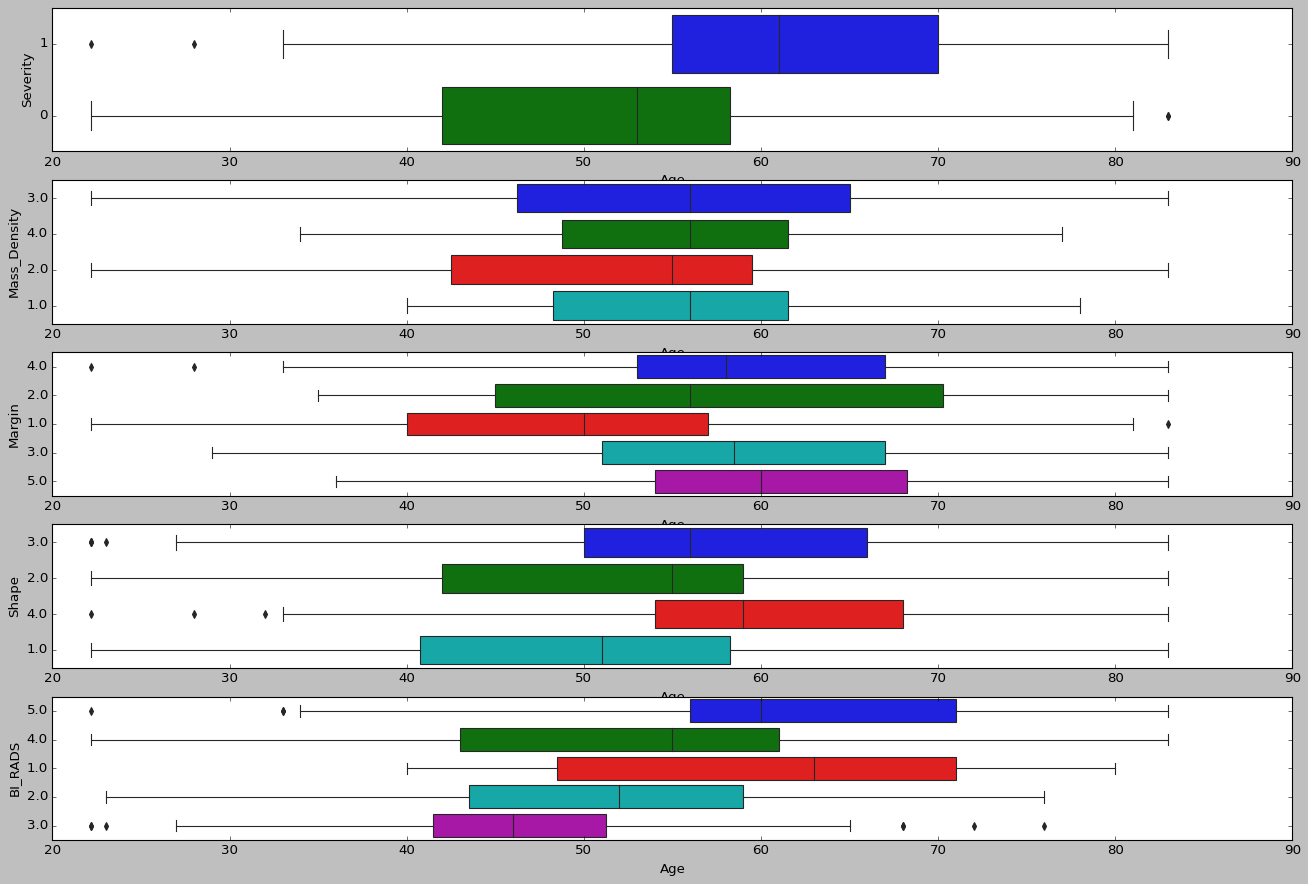

In [45]:
plt.figure(figsize=[20,13])
plt.style.use("classic")
plt.subplot(511)
sns.boxplot(x='Age',y="Severity", data= Breast_cancer_data)
plt.subplot(512)
sns.boxplot(x='Age',y="Mass_Density", data= Breast_cancer_data)
plt.subplot(513)
sns.boxplot(x='Age',y="Margin", data= Breast_cancer_data)
plt.subplot(514)
sns.boxplot(x='Age',y="Shape", data= Breast_cancer_data)
plt.subplot(515)
sns.boxplot(x='Age',y="BI_RADS", data= Breast_cancer_data)

In [46]:
Benign_cancer = Breast_cancer_data[Breast_cancer_data['Severity']=='0']
Malignant_cancer = Breast_cancer_data[Breast_cancer_data['Severity']=='1']

In [47]:
Breast_cancer_data.dtypes

BI_RADS          object
Age             float64
Shape            object
Margin           object
Mass_Density     object
Severity         object
type             object
dtype: object

In [48]:
Breast_cancer_data['Severity'].value_counts()

0    516
1    445
Name: Severity, dtype: int64

In [49]:
Benign_cancer_percent = (len(Benign_cancer)/len(Breast_cancer_data))*100
Benign_cancer_percent

53.69406867845994

In [50]:
Malignant_cancer_percent = (len(Malignant_cancer)/len(Breast_cancer_data))*100
Malignant_cancer_percent

46.30593132154006

In [51]:
Breast_cancer_data['Age'] = Breast_cancer_data['Age'].astype(int)

<AxesSubplot:xlabel='Mass_Density', ylabel='count'>

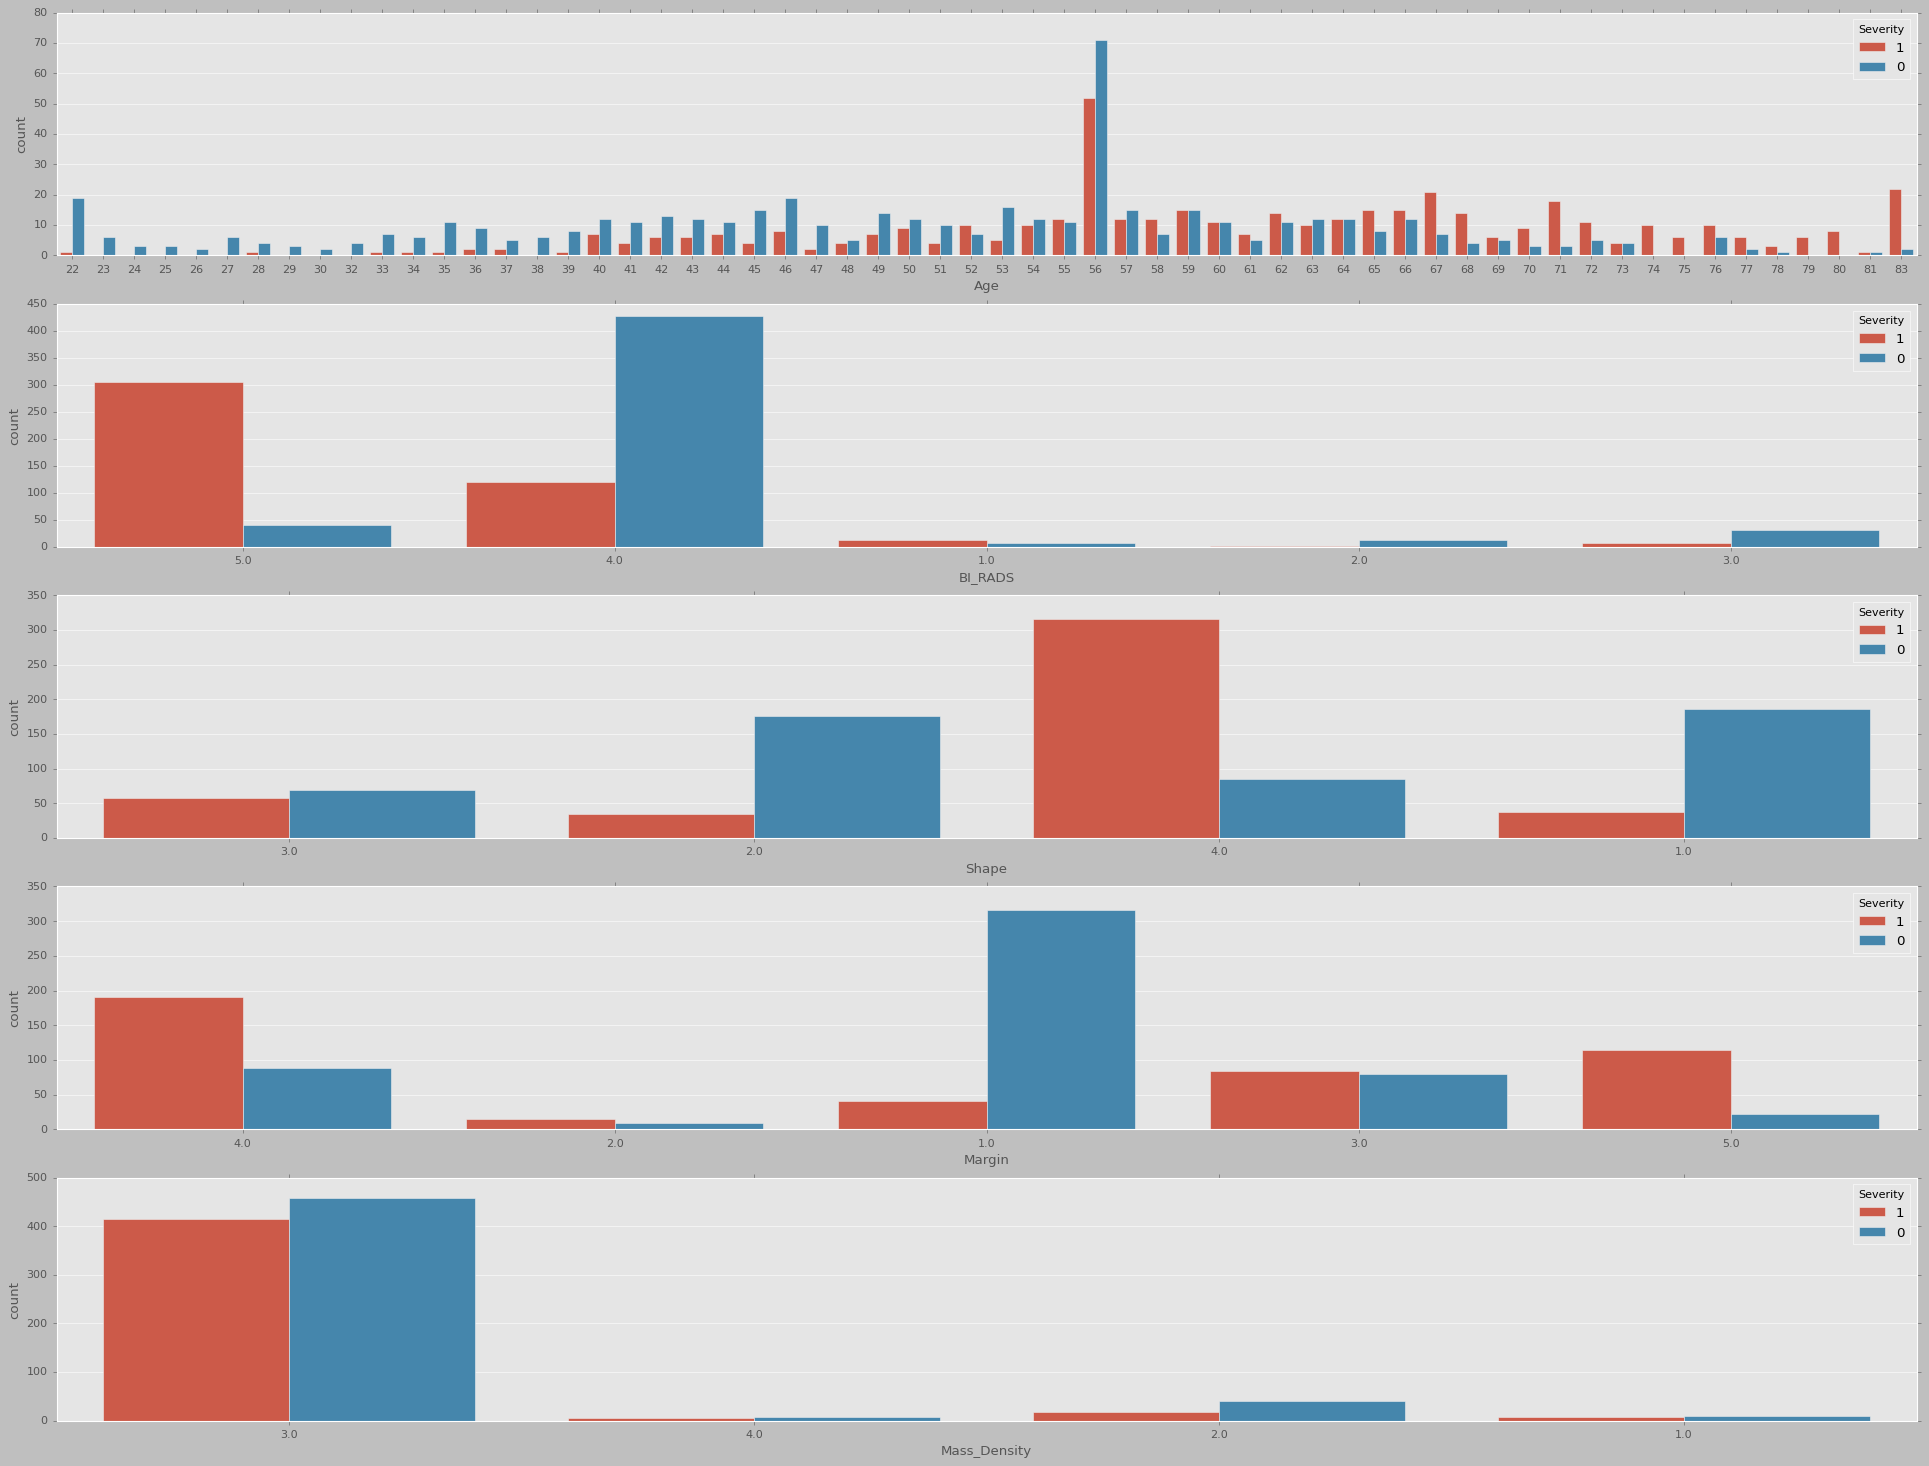

In [52]:
plt.figure(figsize=[30,22])
plt.style.use("ggplot")
plt.subplot(511)
sns.countplot(x = 'Age', hue='Severity', data = Breast_cancer_data)
plt.subplot(512)
sns.countplot(x ='BI_RADS', hue='Severity', data = Breast_cancer_data)
plt.subplot(513)
sns.countplot(x ='Shape', hue='Severity', data = Breast_cancer_data)
plt.subplot(514)
sns.countplot(x ='Margin', hue='Severity', data = Breast_cancer_data)
plt.subplot(515)
sns.countplot(x ='Mass_Density', hue='Severity', data = Breast_cancer_data)



In [53]:
Breast_cancer_data_train = Breast_cancer_data[Breast_cancer_data["type"]=="train"]
Breast_cancer_data_train

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,type
0,5.0,67,3.0,5.0,3.0,1,train
1,4.0,43,1.0,1.0,3.0,1,train
2,5.0,58,4.0,5.0,3.0,1,train
3,4.0,28,1.0,1.0,3.0,0,train
4,5.0,74,1.0,5.0,3.0,1,train
...,...,...,...,...,...,...,...
806,5.0,62,4.0,4.0,2.0,1,train
807,4.0,56,2.0,1.0,3.0,0,train
808,5.0,58,4.0,4.0,3.0,1,train
809,4.0,56,1.0,4.0,3.0,0,train


In [54]:
Breast_cancer_data_train.drop("type", axis='columns',inplace=True)
Breast_cancer_data_train_numeric=Breast_cancer_data_train[["Age"]]
Breast_cancer_data_train_cat= Breast_cancer_data_train[["BI_RADS",	"Shape","Margin","Mass_Density"]]

C:\Users\Chesta Dhingra\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
## do one hot encoding
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
Breast_cancer_data_train_cat = onehotencoder.fit_transform(Breast_cancer_data_train_cat).toarray()

In [56]:
Breast_cancer_data_train_cat = pd.DataFrame(Breast_cancer_data_train_cat)
Breast_cancer_data_train_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
807,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
808,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
809,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
X_all = pd.concat([Breast_cancer_data_train_cat,Breast_cancer_data_train_numeric],axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Age
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,67
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,58
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,62
807,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56
808,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,58
809,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,56


In [58]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X = scalar.fit_transform(X_all)
X

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.73770492],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.3442623 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.59016393],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.59016393],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.55737705],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.86885246]])

In [59]:
y = Breast_cancer_data_train['Severity']
y

0      1
1      1
2      1
3      0
4      1
      ..
806    1
807    0
808    1
809    0
810    1
Name: Severity, Length: 811, dtype: object

In [60]:
Breast_cancer_data_test = Breast_cancer_data[Breast_cancer_data["type"]=="test"]

In [61]:
Breast_cancer_data_test.drop("type", axis='columns',inplace=True)
Breast_cancer_data_test_numeric=Breast_cancer_data_test[["Age"]]
Breast_cancer_data_test_cat= Breast_cancer_data_test[["BI_RADS","Shape","Margin","Mass_Density"]]

C:\Users\Chesta Dhingra\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
Breast_cancer_data_test_cat = onehotencoder.fit_transform(Breast_cancer_data_test_cat).toarray()

In [63]:
Breast_cancer_data_test_cat = pd.DataFrame(Breast_cancer_data_test_cat)
Breast_cancer_data_test_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [64]:
X_all_test = pd.concat([Breast_cancer_data_test_cat,Breast_cancer_data_test_numeric],axis=1)
X_all_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Age
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,65
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,74
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,57
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47
146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,56
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,64
148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,66


In [65]:
X_test = scalar.fit_transform(X_all_test)
X_test

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70491803],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.85245902],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.55737705],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.68852459],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.72131148],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.6557377 ]])

In [66]:
y_test = Breast_cancer_data_test['Severity']
y_test

0      1
1      1
2      0
3      1
4      0
      ..
145    0
146    1
147    0
148    1
149    0
Name: Severity, Length: 150, dtype: object

In [67]:
X_test.shape

(150, 19)

In [68]:
X_all.shape

(811, 19)

In [69]:
y.shape

(811,)

In [70]:
y_test.shape

(150,)

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def ConfusionMatrix(predicted,ytest_obsv):
    cm = confusion_matrix(predicted, ytest_obsv)
    return (sns.heatmap(cm, annot=True))

In [72]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier()
model_2.fit(X_all, y)

RandomForestClassifier()

In [73]:
y_pred2 = model_2.predict(X_test)
y_pred2

array(['1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0',
       '0', '1', '0', '1', '1', '1', '0'], dtype=object)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

print("Accuracy with Randomforest Classifier {}%".format(100*accuracy_score(y_pred2,y_test)))

Accuracy with Randomforest Classifier 74.0%


<AxesSubplot:>

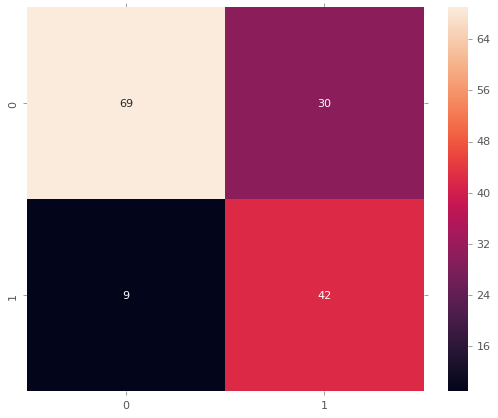

In [75]:
ConfusionMatrix(y_pred2, y_test)

In [76]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        99
           1       0.58      0.82      0.68        51

    accuracy                           0.74       150
   macro avg       0.73      0.76      0.73       150
weighted avg       0.78      0.74      0.75       150



In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1,5,10],
             "min_samples_split" : [2, 4, 10, 12, 16],
             "n_estimators": [50, 100, 400, 700, 1000]}

In [79]:
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

In [80]:
gs = gs.fit(X_all, y)

In [81]:
print(gs.best_score_)
print(gs.best_params_)

0.839729397293973
{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             min_samples_split=2,
                             min_samples_leaf=10,
                             max_features='auto',
                           oob_score=True)

In [83]:
rf.fit(X_all, y)
print ("%.4f" % rf.oob_score_ )

0.8335


In [84]:
y_pred3 = rf.predict(X_test)
y_pred3

array(['1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '0'], dtype=object)

In [85]:
print("Accuracy with Randomforest Classifier {}%".format(100*accuracy_score(y_pred3,y_test)))

Accuracy with Randomforest Classifier 76.0%


<AxesSubplot:>

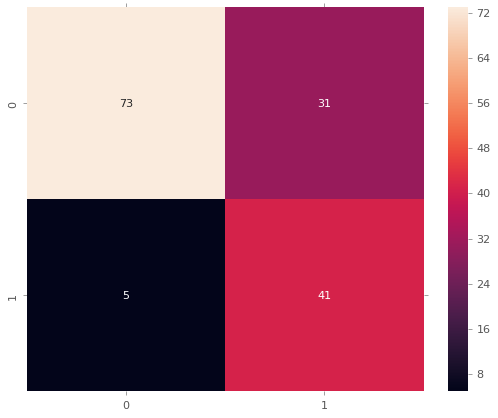

In [86]:
ConfusionMatrix(y_pred3, y_test)

In [87]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       104
           1       0.57      0.89      0.69        46

    accuracy                           0.76       150
   macro avg       0.75      0.80      0.75       150
weighted avg       0.82      0.76      0.77       150



Random Forest is composed of ensemble learning techniques which operates by constructing decision trees at the training time. These are the bagged decision trees which does split on a subset of features. Like one decision tree splits the data into small subgroups which is based on the features and it should be under one label till the point we reach our conclusion. 
Random forest methodology has been chosen because for this there is no need to have pre-assumptions regarding the distribution of the data and has the capability to handle the skewed and multimodal distribution of data. That can be notice in the particular dataset as well while performing the exploratory data analysis.

Hyperparameter tuning has been done for the particular algorithm that does have an impact on the classification and increases the accuracy level based on the features to predict the response variable. It does helps in optimizing the performance and increases the level of accuracy.

Confusion matrix analysis been performed to evaluate the true positives, false positive and true negatives & false negatives. Other than that the classification report based on precision (which is the ratio of true positives/total true positives and helps to know when model runs how many times it will provide the results of the true class) and recall (which is ratio of actual true true positives; true positive/ truepositive+false negative, how often the classifier was right). 
Lastly look for the F1 score which is overall measure of model's accuracy that combines recall and precision.

As per the Exploratory Data analysis part the data does have some skewness in it and the numerical variable "age" have bimodal distribution . And the data based on the target variable which is "Severity" does not have the classification imbalance.This we can conclude because 53.69% of the patients have found the benign cancer and 46.30% of the patients have malignant cancer. Most of the time benign and malignant tumours are find in the age of 56 which is the median age.
Cells with BI_RADS of 4, shape of 2 and Margin of 1 are mostly classified as benign.  Mass_Density is one such feature which sometimes get misinterpreted between the benign and malignant one cells.

For missing values imputation for the age feature statistical median values have been used and for the outlier treatment in the column quantile methodology has been applied. Whereas for the categorical data KNN imputation has been used because if mode values have been used it will create the imbalance among the nominal and ordinal data.

And data is quite skewed when we look in perspective of target variable and other independent categorical variables.


In [88]:
## using tensorflow as for classification
import tensorflow as tf

In [89]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.Dense(units=500,activation= 'relu',input_shape=(19,)))
model_nn.add(tf.keras.layers.Dense(units=500,activation='relu'))
model_nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [90]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               10000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 261,001
Trainable params: 261,001
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_nn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
X_all.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
Age      int32
dtype: object

In [93]:
y = pd.to_numeric(y)

In [94]:
y_test = pd.to_numeric(y_test)

In [95]:
epochs_hist = model_nn.fit(X_all,y, epochs = 50, batch_size = 32)

Epoch 1/50
26/26 [==============================] - 0s 2ms/step - loss: 1.0731 - accuracy: 0.5006
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7842
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8101
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7879
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8089
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8113
Epoch 7/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8261
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8360
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8286
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8150
Epoch 11/50
26/26 [

In [96]:
y_pred_nn = model_nn.predict(X_test)
y_pred_nn = (y_pred_nn>0.5)
y_pred_nn

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

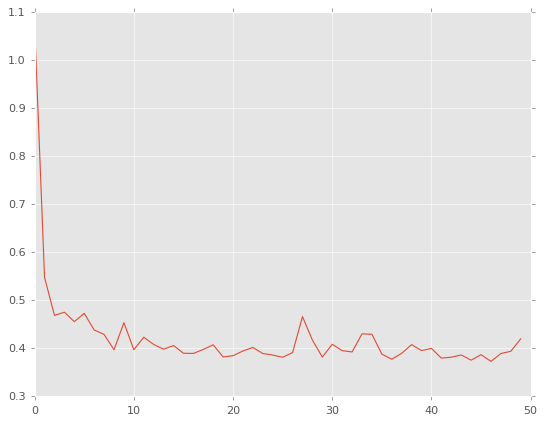

In [97]:
plt.plot(epochs_hist.history['loss'])

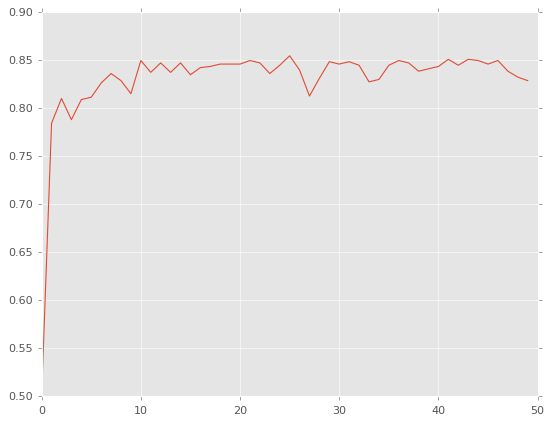

In [98]:
plt.plot(epochs_hist.history['accuracy'])

Text(0.5, 1.0, 'Neural Network training curves')

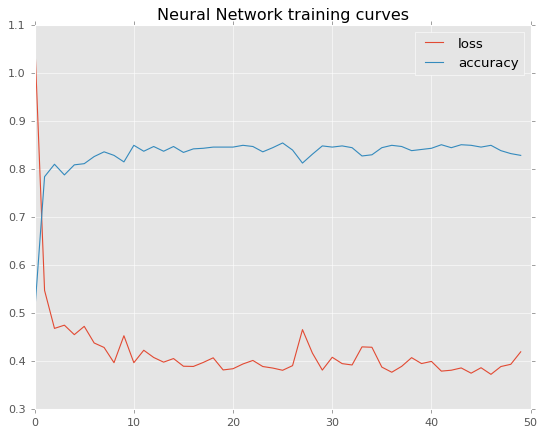

In [99]:
# Plot the loss curves
pd.DataFrame(epochs_hist.history).plot()
plt.title("Neural Network training curves")

In [100]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def ConfusionMatrix(predicted,ytest_obsv):
    cm = confusion_matrix(predicted, ytest_obsv)
    return (sns.heatmap(cm, annot=True))

<AxesSubplot:>

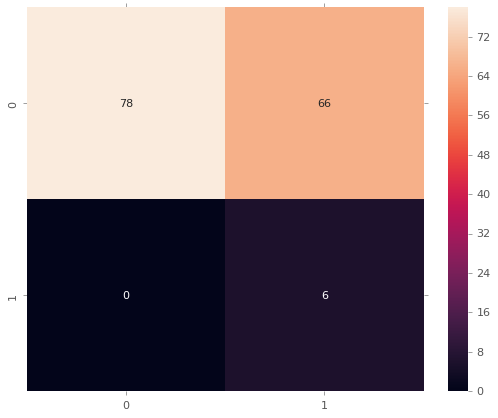

In [101]:
ConfusionMatrix(y_pred_nn,y_test)

In [102]:
print(classification_report(y_pred_nn, y_test))

              precision    recall  f1-score   support

       False       1.00      0.54      0.70       144
        True       0.08      1.00      0.15         6

    accuracy                           0.56       150
   macro avg       0.54      0.77      0.43       150
weighted avg       0.96      0.56      0.68       150



In [148]:
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")


5/5 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5600
Model loss on test set: 0.6863901019096375
Model accuracy on test set: 56.00%


In [149]:
model_nn2 = tf.keras.Sequential()
model_nn2.add(tf.keras.layers.Dense(units=500,activation= 'sigmoid',input_shape=(19,)))
model_nn2.add(tf.keras.layers.Dense(units=500,activation= 'sigmoid'))
model_nn2.add(tf.keras.layers.Dense(units=500,activation= 'sigmoid'))
model_nn2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [150]:
model_nn2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               10000     
_________________________________________________________________
dense_39 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_40 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 501       
Total params: 511,501
Trainable params: 511,501
Non-trainable params: 0
_________________________________________________________________


In [151]:
model_nn2.compile(optimizer ='Adam', loss = 'binary_crossentropy',metrics=['accuracy'])
#model_nn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [152]:
epochs_hist2 = model_nn2.fit(X_all,y, epochs = 100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7383 - accuracy: 0.5339
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6079
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5287 - accuracy: 0.7398
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4924 - accuracy: 0.7731
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.8187
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.8249
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8237: 0s - loss: 0.4085 - accuracy: 0.81
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.8224
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8261
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss:

Text(0.5, 1.0, 'Second Model of NN')

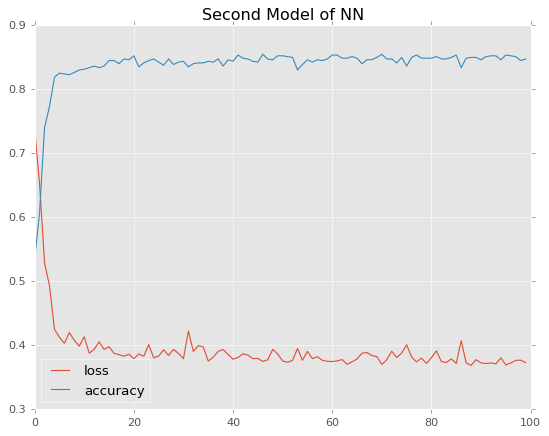

In [153]:
pd.DataFrame(epochs_hist2.history).plot()
plt.title("Second Model of NN")

In [154]:
y_pred_nn2 = model_nn2.predict(X_test)
y_pred_nn2 = (y_pred_nn2>0.5)
y_pred_nn2

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

<AxesSubplot:>

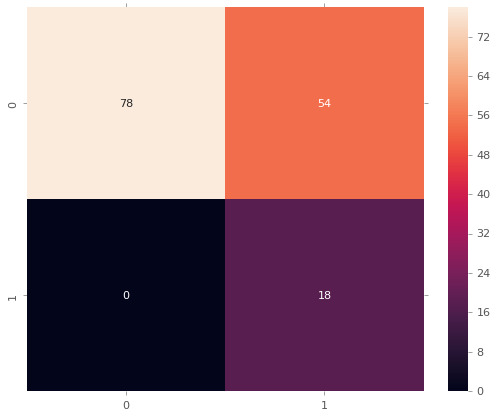

In [155]:
ConfusionMatrix(y_pred_nn2,y_test)

In [156]:
print(classification_report(y_pred_nn2,y_test))

              precision    recall  f1-score   support

       False       1.00      0.59      0.74       132
        True       0.25      1.00      0.40        18

    accuracy                           0.64       150
   macro avg       0.62      0.80      0.57       150
weighted avg       0.91      0.64      0.70       150



In [157]:
loss2, accuracy2 = model_nn2.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss2}")
print(f"Model accuracy on test set: {(accuracy2*100):.2f}%")

5/5 [==============================] - 0s 2ms/step - loss: 1.2727 - accuracy: 0.6400
Model loss on test set: 1.2726575136184692
Model accuracy on test set: 64.00%


In [181]:
model_nn3 = tf.keras.Sequential()
model_nn3.add(tf.keras.layers.Dense(units=500,activation= 'tanh',input_shape=(19,)))
model_nn3.add(tf.keras.layers.Dense(units=500,activation= 'sigmoid'))
model_nn3.add(tf.keras.layers.Dense(units=500,activation= 'sigmoid'))
model_nn3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model_nn3.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 500)               10000     
_________________________________________________________________
dense_55 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_56 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 501       
Total params: 511,501
Trainable params: 511,501
Non-trainable params: 0
_________________________________________________________________


Neural Network with the learning rate. Why learning rate is important?
Neural network are trained based on the stochastic gradient descent algorithm. The optimization algorithm estimates the error gradient for the current state of model.
We will update the model with the help of back-propagation error algorithm. The amount of weights which are updated during the training are known as "Learning Rate".
These steps or the hypertuning that we are doing is to minimize the loss which is going to be depend on learning rate as well This helps in converegnce and we can think of "learning rate" as step size.
Learning rate is based on the "Gradient Descent" algorithm which helps to find the minima and it is also convex function as well to find the good value for weights and bias during backpropagation.



In [182]:
model_nn3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [183]:
epochs_hist3 = model_nn3.fit(X_all,y,epochs=200,batch_size=32)

Epoch 1/200
26/26 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.5512
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.6782
Epoch 3/200
26/26 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8249
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8335
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8311
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.8409
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8385
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8397
Epoch 9/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3962 - accuracy: 0.8385
Epoch 10/200
26/26 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8335
Epoch 11/

26/26 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8545
Epoch 84/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8471
Epoch 85/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8557
Epoch 86/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8520
Epoch 87/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3585 - accuracy: 0.8496
Epoch 88/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8582
Epoch 89/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8471
Epoch 90/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3585 - accuracy: 0.8483
Epoch 91/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8459
Epoch 92/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8557
Epoch 93/200


In [184]:
y_pred_nn3 = model_nn3.predict(X_test)
y_pred_nn3 = (y_pred_nn3>0.5)
y_pred_nn3

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

<AxesSubplot:>

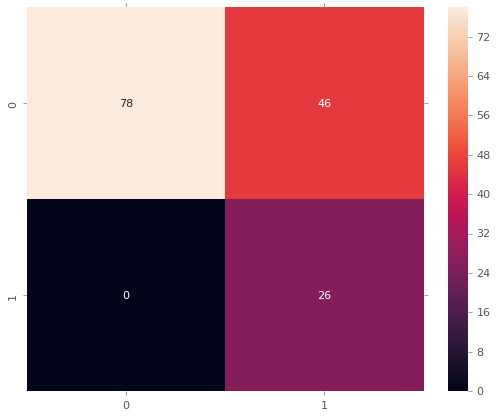

In [185]:
ConfusionMatrix(y_pred_nn3,y_test)

In [186]:
print(classification_report(y_pred_nn3,y_test))

              precision    recall  f1-score   support

       False       1.00      0.63      0.77       124
        True       0.36      1.00      0.53        26

    accuracy                           0.69       150
   macro avg       0.68      0.81      0.65       150
weighted avg       0.89      0.69      0.73       150



In [187]:
loss3, accuracy3 = model_nn3.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss3}")
print(f"Model accuracy on test set: {(accuracy3*100):.2f}%")

5/5 [==============================] - 0s 4ms/step - loss: 2.5678 - accuracy: 0.6933
Model loss on test set: 2.5678203105926514
Model accuracy on test set: 69.33%


In [198]:
model_nn4 = tf.keras.Sequential()
model_nn4.add(tf.keras.layers.Dense(units=500,activation= 'tanh',input_shape=(19,)))
model_nn4.add(tf.keras.layers.Dense(units=300,activation= 'sigmoid'))
model_nn4.add(tf.keras.layers.Dense(units=400,activation= 'tanh'))
model_nn4.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model_nn4.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 500)               10000     
_________________________________________________________________
dense_67 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_68 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 401       
Total params: 281,101
Trainable params: 281,101
Non-trainable params: 0
_________________________________________________________________


In [199]:
model_nn4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
epochs_hist4 = model_nn4.fit(X_all,y,epochs=200,batch_size=32)

Epoch 1/200
26/26 [==============================] - 0s 7ms/step - loss: 0.8412 - accuracy: 0.5080
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.7028
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 0.4404 - accuracy: 0.8187
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 0.4657 - accuracy: 0.8027
Epoch 5/200
26/26 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.8261
Epoch 6/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3914 - accuracy: 0.8385
Epoch 7/200
26/26 [==============================] - 0s 6ms/step - loss: 0.4022 - accuracy: 0.8471
Epoch 8/200
26/26 [==============================] - 0s 5ms/step - loss: 0.4004 - accuracy: 0.8348
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 0.3859 - accuracy: 0.8434
Epoch 10/200
26/26 [==============================] - 0s 5ms/step - loss: 0.3854 - accuracy: 0.8409
Epoch 11/

26/26 [==============================] - 0s 6ms/step - loss: 0.3160 - accuracy: 0.8644
Epoch 164/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3196 - accuracy: 0.8607
Epoch 165/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3209 - accuracy: 0.8705
Epoch 166/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3288 - accuracy: 0.8631
Epoch 167/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3233 - accuracy: 0.8619
Epoch 168/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3146 - accuracy: 0.8668
Epoch 169/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3157 - accuracy: 0.8693
Epoch 170/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3093 - accuracy: 0.8644
Epoch 171/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3139 - accuracy: 0.8644
Epoch 172/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3127 - accuracy: 0.8681
Epoc

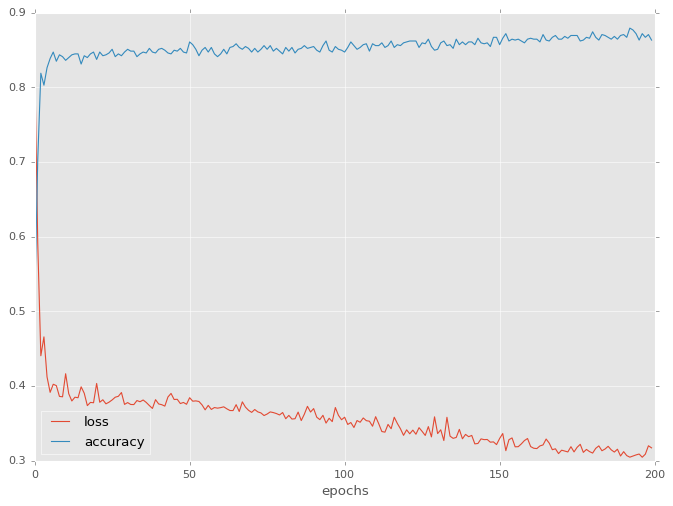

In [200]:
pd.DataFrame(epochs_hist4.history).plot(figsize=(10,7), xlabel="epochs");

In [201]:
y_pred_nn4 = model_nn4.predict(X_test)
y_pred_nn4 = (y_pred_nn4>0.5)
y_pred_nn4

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

<AxesSubplot:>

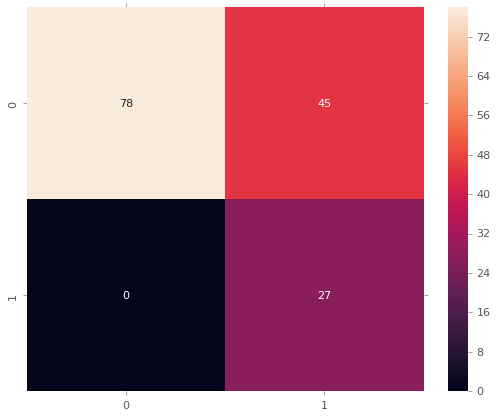

In [202]:
ConfusionMatrix(y_pred_nn4,y_test)

In [203]:
loss, accuracy = model_nn4.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")


5/5 [==============================] - 0s 4ms/step - loss: 2.0865 - accuracy: 0.7000
Model loss on test set: 2.0865328311920166
Model accuracy on test set: 70.00%
